In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

2023-01-25 05:40:15.902130: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-01-25 05:40:15.902256: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
directory = '../input/english-handwritten-characters-dataset/Img'
files=os.listdir(directory)
print(files[0:5])
print(len(files))


['img040-022.png', 'img051-027.png', 'img052-009.png', 'img052-049.png', 'img011-047.png']
3410


In [3]:
# filename and image data
datafile=[]
data=[]
for file in files:
    image=load_img(os.path.join(directory,file),grayscale=False,color_mode='rgb',target_size=(100,100))
    image=img_to_array(image)
    image=image/255.0
    data+=[image]
    datafile+=[file]
print(datafile[0:5])
print(len(datafile))

['img040-022.png', 'img051-027.png', 'img052-009.png', 'img052-049.png', 'img011-047.png']
3410


In [4]:
data1=np.array(data)

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [8]:
# filename and label
engl=pd.read_csv('../input/english-handwritten-characters-dataset/english.csv')
engl.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [9]:
factlabel=pd.factorize(engl['label'])

print(factlabel[0])
print(factlabel[1])

[ 0  0  0 ... 61 61 61]
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='object')


In [10]:
labelfile=[]
for item in engl['image']:
    labelfile+=[item[4:]]
engl['file']=labelfile
engl['labeln']=factlabel[0]

print(engl.head())

                image label            file  labeln
0  Img/img001-001.png     0  img001-001.png       0
1  Img/img001-002.png     0  img001-002.png       0
2  Img/img001-003.png     0  img001-003.png       0
3  Img/img001-004.png     0  img001-004.png       0
4  Img/img001-005.png     0  img001-005.png       0


In [11]:
# set labels in image data order
engl2=[]
for item in datafile:
    engl2+=[engl['labeln'][engl['file']==item].values[0]]
    
print(engl2[0:5])
print(datafile[0:5])

[39, 50, 51, 51, 10]
['img040-022.png', 'img051-027.png', 'img052-009.png', 'img052-049.png', 'img011-047.png']


In [12]:
labels1=to_categorical(engl2)
labels2=np.array(labels1)

print("Data Shape:{}\nLabels shape: {}".format(data1.shape,labels2.shape))
xtr = data1
xt = data1

Data Shape:(3410, 100, 100, 3)
Labels shape: (3410, 62)


In [13]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(data1,labels2,test_size=0.2,random_state=44)

In [14]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")
yt = data1
ytr = data1

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2023-01-25 05:44:22.685429: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-25 05:44:22.688270: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-01-25 05:44:22.688303: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 05:44:22.688343: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (de2777e1ceb3): /proc/driver/nvidia/version does not exist
2023-01-25 05:44:22.689978: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [21]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)
print(data1.shape)
print(labels2.shape)

(2728, 100, 100, 3)
(2728, 62)
(682, 100, 100, 3)
(682, 62)
(3410, 100, 100, 3)
(3410, 62)


In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

2023-01-25 05:44:35.638850: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-25 05:44:35.652530: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/20
1563/1563 [==============================] - 40s 25ms/step - loss: 1.7635 - accuracy: 0.3434 - val_loss: 1.3053 - val_accuracy: 0.5257
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2473 - accuracy: 0.5574 - val_loss: 1.1586 - val_accuracy: 0.5882
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0587 - accuracy: 0.6297 - val_loss: 1.0729 - val_accuracy: 0.6254
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9503 - accuracy: 0.6658 - val_loss: 0.9869 - val_accuracy: 0.6502
Epoch 5/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8718 - accuracy: 0.6966 - val_loss: 0.9059 - val_accuracy: 0.6805
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7996 - accuracy: 0.7217 - val_loss: 0.9146 - val_accuracy: 0.6859
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7592 - accuracy: 0.7312 - val_loss: 0.9072 -

313/313 - 2s - loss: 1.1440 - accuracy: 0.6965


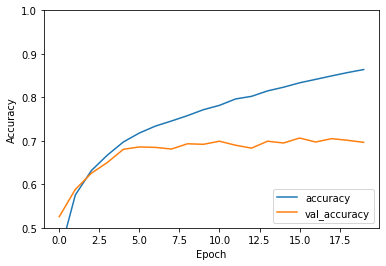

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [25]:
print(test_acc)

0.6965000033378601


In [36]:
pred = model.predict(test_images)
print(pred)

[[ -0.2501314 -11.153797    3.1070065 ...  -5.466902   -6.2231617
   -6.9587502]
 [  6.144456    8.858207   -7.0211573 ... -17.497927   20.608755
    3.296145 ]
 [  2.308906    1.610189   -1.2199771 ...  -1.8764123   6.1129146
    3.5898747]
 ...
 [-11.800894  -14.396158    3.2910845 ...   1.6884868 -13.858728
  -13.971363 ]
 [  2.647414    3.9298294  -1.0366255 ...  -4.7124286 -10.102867
   -4.3783436]
 [-13.113553  -12.936512    1.4396883 ...  16.154606   -5.4004726
   -6.755494 ]]
[ -0.2501314  -11.153797     3.1070065    9.186378    -0.89063656
   2.4601064   -1.662823    -5.466902    -6.2231617   -6.9587502 ]


9